# 0. Loading Data
Consider the Concrete Compressive Strength dataset from the first assignment


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
import torch


data = pd.read_csv('Concrete_Data.csv')
XX = data.iloc[:,0:-1].values
Y1 = data.iloc[:, -1].values.reshape(-1,1)
P = np.ones((XX.shape[0]))
X1 = np.vstack((P, XX.T)).T
w = np.ones((X1.shape[1])).reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1,test_size=0.25, random_state=0)


Min Max Normalizer

In [ ]:
# Min Max Normalizer
import numpy as np
class MinMax_Normalizer:
  def __init__(self):
    pass

  def fit(self, X):
    self.min = np.min(X)
    self.range = np.max(X) - self.min

  def transform(self, X):
    X_scaled = (X - self.min)/self.range
    return X_scaled

  def fit_transfrom(self, X):
    self.fit(X)
    return self.transform(X)

minmax = MinMax_Normalizer()
Xs_train = minmax.fit_transfrom(X_train)
Xs_test = minmax.transform(X_test)


In [ ]:
Xp_train, Xp_test, Yp_train, Yp_test = map(torch.tensor, (Xs_train, Xs_test, Y_train, Y_test))
Xp_train = Xp_train.float()
Xp_test = Xp_test.float()
Yp_train = Yp_train.float()
Yp_test = Yp_test.float()

# 1. Write a Python program to solve the linear regression problem batch gradient descent.

a. Implement batch gradient descent from scratch in Python, without
input data normalization. Experiment with various learning rates.
State your observations.

      We can see the different learning rates and respective MSE for 100000 Iterations

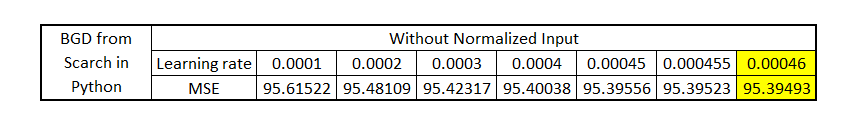

    Optimum rate is 0.00046 which gives lowest MSE 95.39493
    
    1. Without normalization of input data loss function is question sensitive with respect to the scales of input data.
    2. Learning rates:
         a. When I took very less learning rate, the optimizing process was quite slow and convergence taken more time
         b. When I took Large learning rate, the optimization process converged in less time, but there were ocillations.
         And sometimes overflow of values error came.
         c. With appropiate learning rate which I got after trying few learning rate.
         Convergence was with medium time and oscillaions were less.

b. Implement batch gradient from scratch in Python, with input data
normalization. Experiment with various learning rates to determine
optimal learning rate. State your observations in this case.

    we can see MSEs for different learning rate for 100000 iterations
    It helps to speed up the convergence and prevent issues with exploding or vanishing gradients.

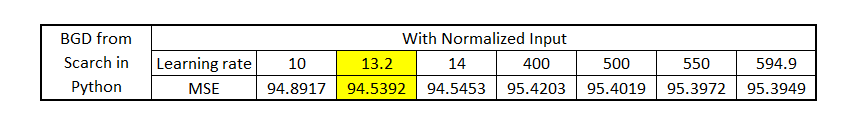

    The optimal learning rate is 13.2
    With normalization of data scaling of input data taken place that is why all the input feature came in same range.
    Due to which the convergence got speed up and accuracy improvement done.

c. Repeat a & b using Pytorch’s implementation of gradient descent
and compare your results.

      There are not much changes in MSEs and learning rate combinations
      But definately time required for PyTroch is way less than with Python only
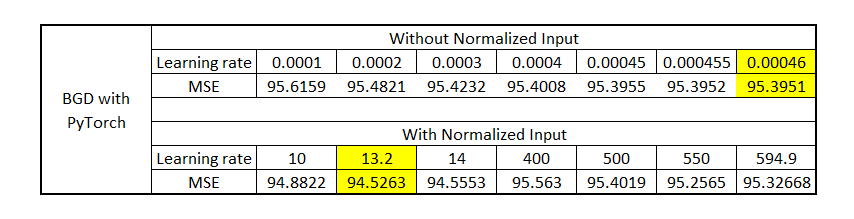


      The feature of PyTorch to automatically differenciation helped me in gradient descent optimization.
      Due to PyTorch convergence was early at the same time, the convergnce got speed up a lot.





a. Batch Gradient Descent without input data normalization

In [ ]:
# Batch Gradient Descent Without Input data Normalization
class LinearRegression1:

  def __init__(self):
    self.w = None

  def linearmodel(self, x):
    return np.dot(x, self.w)

  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.linearmodel(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)

  def mean_sqaure_error(self, Y_pred,Y):
    Loss = []
    for i,j in zip(Y, Y_pred):
      L = (i - j)**2
      Loss.append(L)
    return sum(Loss)[0]/(len(Loss))

  def R_squared(self, Y_pred, Y):
    Y_mean = np.mean(Y)
    E1 = np.sum((Y_pred - Y)**2)
    E2 = np.sum((Y - Y_mean)**2)
    return 1 - E1/E2

  def grad_w(self, x, y):
    y_pred = self.linearmodel(x)
    return (2/self.m*(y_pred - y) * x.T).reshape(-1,1)

  def fit(self, X , Y, epochs = 1, lr = 1 , initialise = True, display_loss = True):
    self.m = X.shape[0]

    if initialise:
      self.w = np.zeros(X.shape[1]).reshape(-1,1)

    if display_loss:
      self.MSE = {}
      self.R2 = {}

    for i in tqdm(range(epochs+1), total=epochs, unit="epoch"):
      dw = np.zeros((X.shape[1], 1))

      for x, y in zip(X, Y):
        dw = dw + self.grad_w(x, y)
      self.w -= lr * dw/(X.shape[0])

      if display_loss:
          Y_pred = self.predict(X)
          self.MSE[i] = self.mean_sqaure_error(Y_pred, Y)
          R2 = self.R_squared(Y_pred, Y)

    return self.w

  def plotting(self):
    fig, ax = plt.subplots()
    ax.plot(list(self.MSE.values()))
    min_y = np.min(list(self.MSE.values()))
    ax.axhline(y=min_y, color='r', linestyle='--')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.title('Batch GD without Normalized input\n Epochs = 100000\n Learning Rate = {}'.format(i))
    ymin, ymax = ax.get_ylim()
    ax.yaxis.set_ticks(np.arange(ymin, ymax, (ymax-ymin)/3))
    ax.annotate(str(min_y), xy=(0, min_y), xycoords='data', xytext=(-50, 30),
                textcoords='offset points', arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.2"))
    plt.show()


Learning_rate  = [0.0003, 0.0004, 0.00046]
epochs = []
for i in Learning_rate :
  LR = LinearRegression1()
  w = LR.fit(X_train, Y_train, 100000, i)
  LR.plotting()
  Y_pred = LR.predict(X_test)
  MSE_BGD = LR.mean_sqaure_error(Y_pred,Y_test)
  R2_BGD = LR.R_squared(Y_pred, Y_test)
  print('MSE_BGD on Test Data at Learning rate',i ,':',MSE_BGD)
  print('R2_BGD on Test Data at Learning rate',i ,':',R2_BGD)

  0%|          | 0/100000 [00:00<?, ?epoch/s]

KeyboardInterrupt: ignored

b. Batch Gradient Descent with input data normalization (Min Max Normalizer)



In [ ]:
class LinearRegression1:

  def __init__(self):
    self.w = None

  def linearmodel(self, x):
    return np.dot(x, self.w)

  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.linearmodel(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)

  def mean_sqaure_error(self, Y_pred,Y):
    Loss = []
    for i,j in zip(Y, Y_pred):
      L = (i - j)**2
      Loss.append(L)
    return sum(Loss)[0]/(len(Loss))

  def R_squared(self, Y_pred, Y):
    Y_mean = np.mean(Y)
    E1 = np.sum((Y_pred - Y)**2)
    E2 = np.sum((Y - Y_mean)**2)
    return 1 - E1/E2

  def grad_w(self, x, y):
    y_pred = self.linearmodel(x)
    return (2/self.m*(y_pred - y) * x.T).reshape(-1,1)

  def fit(self, X , Y, epochs = 1, lr = 1 , initialise = True, display_loss = True):
    self.m = X.shape[0]

    if initialise:
      self.w = np.zeros(X.shape[1]).reshape(-1,1)

    if display_loss:
      self.MSE = {}
      self.R2 = {}

    for i in tqdm(range(epochs+1), total=epochs, unit="epoch"):
      dw = np.zeros((X.shape[1], 1))

      for x, y in zip(X, Y):
        dw = dw + self.grad_w(x, y)
      self.w -= lr * dw/(X.shape[0])

      if display_loss:
          Y_pred = self.predict(X)
          self.MSE[i] = self.mean_sqaure_error(Y_pred, Y)
          R2 = self.R_squared(Y_pred, Y)

    return self.w

  def plotting(self):
    fig, ax = plt.subplots()
    ax.plot(list(self.MSE.values()))
    min_y = np.min(list(self.MSE.values()))
    ax.axhline(y=min_y, color='r', linestyle='--')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.title('Batch GD with Normalized input\n Epochs = 50000\n Learning Rate = {}'.format(i))
    ymin, ymax = ax.get_ylim()
    ax.yaxis.set_ticks(np.arange(ymin, ymax, (ymax-ymin)/3))
    ax.annotate(str(min_y), xy=(0, min_y), xycoords='data', xytext=(-50, 30),
                textcoords='offset points', arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.2"))
    plt.show()


Learning_rate  = [10, 13.2, 14]
epochs = []
for i in Learning_rate :
  LR = LinearRegression1()
  w = LR.fit(Xs_train, Y_train, 100000, i)
  LR.plotting()
  Y_pred = LR.predict(Xs_test)
  MSE_Normalized_BGD = LR.mean_sqaure_error(Y_pred,Y_test)
  R2_Normalized_BGD = LR.R_squared(Y_pred, Y_test)
  print('MSE_Normalized_BGD on Test Data at Learning rate',i ,':',MSE_Normalized_BGD)
  print('R2_Normalized_BGD on Test Data at Learning rate',i ,':',R2_Normalized_BGD)

  0%|          | 0/100000 [00:00<?, ?epoch/s]

KeyboardInterrupt: ignored

C. Batch Gradient Descent with Pytorch

Without Normalization

In [ ]:

Xpb_train, Xpb_test, Ypb_train, Ypb_test = map(torch.tensor, (X_train, X_test, Y_train, Y_test))
Xpb_train = Xpb_train.float()
Xpb_test = Xpb_test.float()
Ypb_train = Ypb_train.float()
Ypb_test = Ypb_test.float()

class LinearRegression1:

    def __init__(self):
        self.w = None
        self.MSE = None

    def linearmodel(self, x):
        return torch.matmul(x, self.w.t())

    def predict(self, X):
        return self.linearmodel(X)

    def mean_square_error(self, Y_pred, Y):
        diff = Y_pred - Y
        return torch.sum(diff * diff) / diff.numel()

    def R_squared(self, Y_pred, Y):
        Y_mean = torch.mean(Y)
        SS_tot = torch.sum((Y - Y_mean) ** 2)
        SS_res = torch.sum((Y - Y_pred) ** 2)
        return 1 - (SS_res / SS_tot)

    def fit(self, X, Y, epochs=10000, lr=0.11, initialise=True, display_loss=True):
        if initialise:
            self.w = torch.randn(1, X.shape[1], requires_grad=True)
        self.MSE = {}
        for i in tqdm(range(epochs+1), total=epochs, unit="epoch"):
            Y_pred = self.linearmodel(X)
            loss = self.mean_square_error(Y_pred, Y)
            if i % 50 == 0:
                self.MSE[i] = loss.data
            loss.backward()
            with torch.no_grad():
                self.w -= lr *self.w.grad/X.shape[0]
                self.w.grad.zero_()

        if display_loss:
            print("MSE loss:", loss)

    def plotting(self, lr, epoch):
        fig, ax = plt.subplots()
        ax.plot(list(self.MSE.values()))
        min_y = np.min(list(self.MSE.values()))
        ax.axhline(y=min_y, color='r', linestyle='--')
        plt.xlabel('Epochs')
        plt.ylabel('Mean Squared Error')
        plt.title('Batch GD without Normalized Input in PyTorch\n Epochs = {}\n Learning Rate = {}'.format(epoch, lr))
        ymin, ymax = ax.get_ylim()
        ax.yaxis.set_ticks(np.arange(ymin, ymax, (ymax-ymin)/3))
        ax.annotate(str(min_y), xy=(0, min_y), xycoords='data', xytext=(-50, 30),
                    textcoords='offset points', arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.2"))
        plt.show()

Learning_rate  = [0.0003, 0.0004, 0.00046]
epochs = []
for i in Learning_rate :
  LR = LinearRegression1()
  w = LR.fit(Xpb_train, Ypb_train, 100000, i)
  LR.plotting(i, 100000)
  Y_pred = LR.predict(Xpb_test)
  MSE_BGD = LR.mean_square_error(Y_pred,Ypb_test)
  R2_BGD = LR.R_squared(Y_pred, Ypb_test)
  print('MSE_BGD on Test Data at Learning rate with Pytorch',i ,':',MSE_BGD)
  print('R2_BGD on Test Data at Learning rate with Pytorch',i ,':',R2_BGD)

  0%|          | 0/100000 [00:00<?, ?epoch/s]

KeyboardInterrupt: ignored

With Normalization

In [ ]:
class LinearRegression1:

    def __init__(self):
        self.w = None
        self.MSE = None

    def linearmodel(self, x):
        return torch.matmul(x, self.w.t())

    def predict(self, X):
        return self.linearmodel(X)

    def mean_square_error(self, Y_pred, Y):
        diff = Y_pred - Y
        return torch.sum(diff * diff) / diff.numel()

    def R_squared(self, Y_pred, Y):
        Y_mean = torch.mean(Y)
        SS_tot = torch.sum((Y - Y_mean) ** 2)
        SS_res = torch.sum((Y - Y_pred) ** 2)
        return 1 - (SS_res / SS_tot)

    def fit(self, X, Y, epochs=10000, lr=0.11, initialise=True, display_loss=True):
        if initialise:
            self.w = torch.randn(1, X.shape[1], requires_grad=True)
        self.MSE = {}
        for i in tqdm(range(epochs+1), total=epochs, unit="epoch"):
            Y_pred = self.linearmodel(X)
            loss = self.mean_square_error(Y_pred, Y)
            if i % 50 == 0:
                self.MSE[i] = loss.data
            loss.backward()
            with torch.no_grad():
                self.w -= lr *self.w.grad/X.shape[0]
                self.w.grad.zero_()

        if display_loss:
            print("MSE loss:", loss)

    def plotting(self, lr, epoch):
        fig, ax = plt.subplots()
        ax.plot(list(self.MSE.values()))
        min_y = np.min(list(self.MSE.values()))
        ax.axhline(y=min_y, color='r', linestyle='--')
        plt.xlabel('Epochs')
        plt.ylabel('Mean Squared Error')
        plt.title('Batch GD with Normalized Input in PyTorch\n Epochs = {}\n Learning Rate = {}'.format(epoch, lr))
        ymin, ymax = ax.get_ylim()
        ax.yaxis.set_ticks(np.arange(ymin, ymax, (ymax-ymin)/3))
        ax.annotate(str(min_y), xy=(0, min_y), xycoords='data', xytext=(-50, 30),
                    textcoords='offset points', arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.2"))
        plt.show()

Learning_rate  = [11, 13.2, 14]
epochs = []
for i in Learning_rate :
  LR = LinearRegression1()
  w = LR.fit(Xp_train, Yp_train, 100000, i)
  LR.plotting(i, 100000)
  Y_pred = LR.predict(Xp_test)
  MSE_Normalized_BGD = LR.mean_square_error(Y_pred,Yp_test)
  R2_Normalized_BGD = LR.R_squared(Y_pred, Yp_test)
  print('MSE_Normalized_BGD on Test Data at Learning rate with Pytorch',i ,':',MSE_Normalized_BGD)
  print('R2_Normalized_BGD on Test Data at Learning rate with Pytorch',i ,':',R2_Normalized_BGD)


  0%|          | 0/100000 [00:00<?, ?epoch/s]

KeyboardInterrupt: ignored

# 2. Repeat 1b and 1c for stochastic gradient descent and mini-batch gradient descent.

      1. Stochastic GD:
            a. Quick but convergence is slow and erratic
            b. Many updates per epoch. We are iterating over each data point.
            c. Gradient is bit approximatic due to each data update.
            d. Lot of oscillations from one datapoint to another datapoint.
            e. Every points literally behaves greedy.
         Number of iterations for convergence are less than BGD

      2. Mini Batch GD:
            a. Compromise between BGD and SGD
            b. Slightly better than Stochastic GD
            c. Higher the value of bath size accuray was good
            d. Less oacillations
        Number of iterations for convergence are between BGD and SGD
         mostly depend on batch size

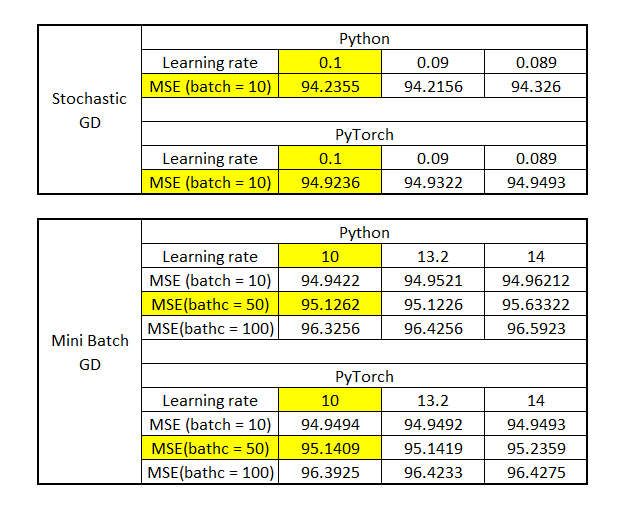

Stochastic gradient descent

From Scratch in Python

In [ ]:
class LinearRegression1:

  def __init__(self):
    self.w = None

  def linearmodel(self, x):
    return np.dot(x, self.w)

  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.linearmodel(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)

  def mean_sqaure_error(self, Y_pred,Y):
    Loss = []
    for i,j in zip(Y, Y_pred):
      L = (i - j)**2
      Loss.append(L)
    return sum(Loss)[0]/(len(Loss))

  def R_squared(self, Y_pred, Y):
    Y_mean = np.mean(Y)
    E1 = np.sum((Y_pred - Y)**2)
    E2 = np.sum((Y - Y_mean)**2)
    return 1 - E1/E2

  def grad_w(self, x, y):
    y_pred = self.linearmodel(x)
    return (2/self.m*(y_pred - y) * x.T).reshape(-1,1)

  def fit(self, X , Y, epochs = 1, lr = 1 , initialise = True, display_loss = True):
    self.m = X.shape[0]

    if initialise:
      self.w = np.zeros(X.shape[1]).reshape(-1,1)

    if display_loss:
      self.MSE = {}
      self.R2 = {}

    for i in tqdm(range(epochs+1), total=epochs, unit="epoch"):
      dw = np.zeros((X.shape[1], 1))

      for x, y in zip(X, Y):
        dw = dw + self.grad_w(x, y)
        self.w -= lr * dw

      if display_loss:
          Y_pred = self.predict(X)
          self.MSE[i] = self.mean_sqaure_error(Y_pred, Y)
          R2 = self.R_squared(Y_pred, Y)

    return self.w

  def plotting(self):
    fig, ax = plt.subplots()
    ax.plot(list(self.MSE.values()))
    min_y = np.min(list(self.MSE.values()))
    ax.axhline(y=min_y, color='r', linestyle='--')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.title('Stochastic GD\n Epochs = 50000\n Learning Rate = {}'.format(i))
    ymin, ymax = ax.get_ylim()
    ax.yaxis.set_ticks(np.arange(ymin, ymax, (ymax-ymin)/3))
    ax.annotate(str(min_y), xy=(0, min_y), xycoords='data', xytext=(-50, 30),
                textcoords='offset points', arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.2"))
    plt.show()


Learning_rate  = [0.1, 0.09, 0.089 ]
epochs = []
for i in Learning_rate :
  LR = LinearRegression1()
  w = LR.fit(Xs_train, Y_train, 100000, i)
  LR.plotting()
  Y_pred = LR.predict(Xs_test)
  MSE = LR.mean_sqaure_error(Y_pred,Y_test)
  R2 = LR.R_squared(Y_pred, Y_test)
  print('MSE_Normalized_BGD on Test Data at Learning rate',i ,':',MSE)
  print('R2_Normalized_BGD on Test Data at Learning rate',i ,':',R2)

  0%|          | 0/100000 [00:00<?, ?epoch/s]

KeyboardInterrupt: ignored

Stochastic GD in Pytorch

In [ ]:
class LinearRegression1:

    def __init__(self):
        self.w = None
        self.MSE = None

    def linearmodel(self, x):
        return torch.matmul(x, self.w.t())

    def predict(self, X):
        return self.linearmodel(X)

    def mean_square_error(self, Y_pred, Y):
        diff = Y_pred - Y
        return torch.sum(diff * diff) / diff.numel()

    def R_squared(self, Y_pred, Y):
        Y_mean = torch.mean(Y)
        SS_tot = torch.sum((Y - Y_mean) ** 2)
        SS_res = torch.sum((Y - Y_pred) ** 2)
        return 1 - (SS_res / SS_tot)

    def fit(self, X, Y, epochs=10000, lr=0.11, initialise=True, display_loss=True):
        if initialise:
            self.w = torch.randn(1, X.shape[1], requires_grad=True)
        self.MSE = {}
        for i in tqdm(range(epochs+1), total=epochs, unit="epoch"):

          for x, y in zip(X, Y):

            y_pred = self.linearmodel(x)
            loss = self.mean_square_error(y_pred, y)
            if i % 50 == 0:
                self.MSE[i] = loss.data
            loss.backward()
            with torch.no_grad():
                self.w -= lr *self.w.grad/X.shape[0]
                self.w.grad.zero_()

        if display_loss:
            print("MSE loss:", loss)

    def plotting(self, lr, epoch):
        fig, ax = plt.subplots()
        ax.plot(list(self.MSE.values()))
        min_y = np.min(list(self.MSE.values()))
        ax.axhline(y=min_y, color='r', linestyle='--')
        plt.xlabel('Epochs')
        plt.ylabel('Mean Squared Error')
        plt.title('Stochastic GD in PyTorch\n Epochs = {}\n Learning Rate = {}'.format(epoch, lr))
        ymin, ymax = ax.get_ylim()
        ax.yaxis.set_ticks(np.arange(ymin, ymax, (ymax-ymin)/3))
        ax.annotate(str(min_y), xy=(0, min_y), xycoords='data', xytext=(-50, 30),
                    textcoords='offset points', arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.2"))
        plt.show()

Learning_rate  = [0.1, 0.09, 0.089]
epochs = []
for i in Learning_rate :
  LR = LinearRegression1()
  w = LR.fit(Xp_train, Yp_train, 100000, i)
  LR.plotting(i, 100000)
  Y_pred = LR.predict(Xp_test)
  MSE = LR.mean_square_error(Y_pred,Yp_test)
  R2 = LR.R_squared(Y_pred, Yp_test)
  print('MSE stochastic on Test Data at Learning rate',i ,':',MSE)
  print('R2 stochastic on Test Data at Learning rate',i ,':',R2)

  0%|          | 0/100000 [00:00<?, ?epoch/s]

KeyboardInterrupt: ignored

Min Batch Gradient Descent

From scratch in Python

In [ ]:
class LinearRegression1:

  def __init__(self):
    self.w = None

  def linearmodel(self, x):
    return np.dot(x, self.w)

  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.linearmodel(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)

  def mean_sqaure_error(self, Y_pred,Y):
    Loss = []
    for i,j in zip(Y, Y_pred):
      L = (i - j)**2
      Loss.append(L)
    return sum(Loss)[0]/(len(Loss))

  def R_squared(self, Y_pred, Y):
    Y_mean = np.mean(Y)
    E1 = np.sum((Y_pred - Y)**2)
    E2 = np.sum((Y - Y_mean)**2)
    return 1 - E1/E2

  def grad_w(self, x, y):
    y_pred = self.linearmodel(x)
    return (2/self.m*(y_pred - y) * x.T).reshape(-1,1)

  def fit(self, X, Y, epochs=1, lr=1, initialise=True, display_loss=True):
      self.m = X.shape[0]

      if initialise:
          self.w = np.zeros(X.shape[1]).reshape(-1, 1)

      if display_loss:
          self.MSE = {}
          self.R2 = {}

      mini_batch_size = 10

      for i in tqdm(range(epochs), total=epochs, unit="epoch"):
          permutation = np.random.permutation(self.m)
          X = X[permutation, :]
          Y = Y[permutation, :].reshape((self.m, 1))
          X_batches = np.array_split(X, self.m // mini_batch_size)
          Y_batches = np.array_split(Y, self.m // mini_batch_size)

          for X_batch, Y_batch in zip(X_batches, Y_batches):
              dw = np.zeros((X.shape[1], 1))
              num_points_seen = 0
              for x, y in zip(X_batch, Y_batch):
                  dw = dw + self.grad_w(x, y)
                  num_points_seen += 1

              self.w -= lr * dw / num_points_seen

          if display_loss:
              Y_pred = self.predict(X)
              self.MSE[i + 1] = self.mean_sqaure_error(Y_pred, Y)
              R2 = self.R_squared(Y_pred, Y)

      return self.w


  def plotting(self):
    fig, ax = plt.subplots()
    ax.plot(list(self.MSE.values()))
    min_y = np.min(list(self.MSE.values()))
    ax.axhline(y=min_y, color='r', linestyle='--')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.title('Mini Batch GD\n Epochs = 100000\n Learning Rate = {}'.format(i))
    ymin, ymax = ax.get_ylim()
    ax.yaxis.set_ticks(np.arange(ymin, ymax, (ymax-ymin)/3))
    ax.annotate(str(min_y), xy=(0, min_y), xycoords='data', xytext=(-50, 30),
                textcoords='offset points', arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.2"))
    plt.show()


Learning_rate  = [10, 13.2, 14]
epochs = []
for i in Learning_rate :
  LR = LinearRegression1()
  w = LR.fit(Xs_train, Y_train, 100000, i)
  LR.plotting()
  Y_pred = LR.predict(Xs_test)
  MSE= LR.mean_sqaure_error(Y_pred,Y_test)
  R2 = LR.R_squared(Y_pred, Y_test)
  print('MSE on Test Data at Learning rate',i ,':',MSE)
  print('R2 on Test Data at Learning rate',i ,':',R2)

  0%|          | 0/100000 [00:00<?, ?epoch/s]

KeyboardInterrupt: ignored

Mini Batch GD with PyTorch

In [ ]:
class LinearRegression1:

    def __init__(self):
        self.w = None
        self.MSE = None

    def linearmodel(self, x):
        return torch.matmul(x, self.w.t())

    def predict(self, X):
        return self.linearmodel(X)

    def mean_square_error(self, Y_pred, Y):
        diff = Y_pred - Y
        return torch.sum(diff * diff) / diff.numel()

    def R_squared(self, Y_pred, Y):
        Y_mean = torch.mean(Y)
        SS_tot = torch.sum((Y - Y_mean) ** 2)
        SS_res = torch.sum((Y - Y_pred) ** 2)
        return 1 - (SS_res / SS_tot)

    def fit(self, X, Y, epochs=10000, lr=0.11, initialise=True, display_loss=True):
        if initialise:
            self.w = torch.randn(1, X.shape[1], requires_grad=True)
        self.MSE = {}
        batch_size = 10
        for i in tqdm(range(epochs+1), total=epochs, unit="epoch"):


          for x_batch, y_batch in zip(X.split(batch_size), Y.split(batch_size)):

            preds = self.linearmodel(x_batch)
            loss = self.mean_square_error(preds, y_batch)
            if i % 50 == 0:
                self.MSE[i] = loss.data
            loss.backward()
            with torch.no_grad():
                self.w -= self.w.grad * 0.11/x_batch.shape[0]
                self.w.grad.zero_()

        if display_loss:
            print("MSE loss:", loss)

    def plotting(self, lr, epoch):
        fig, ax = plt.subplots()
        ax.plot(list(self.MSE.values()))
        min_y = np.min(list(self.MSE.values()))
        ax.axhline(y=min_y, color='r', linestyle='--')
        plt.xlabel('Epochs')
        plt.ylabel('Mean Squared Error')
        plt.title('Mini Batch GD in PyTorch\n Epochs = {}\n Learning Rate = {}'.format(epoch, lr))
        ymin, ymax = ax.get_ylim()
        ax.yaxis.set_ticks(np.arange(ymin, ymax, (ymax-ymin)/3))
        ax.annotate(str(min_y), xy=(0, min_y), xycoords='data', xytext=(-50, 30),
                    textcoords='offset points', arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.2"))
        plt.show()

Learning_rate  = [10, 13.2, 14]
epochs = []
for i in Learning_rate :
  LR = LinearRegression1()
  w = LR.fit(Xp_train, Yp_train, 100000, i)
  LR.plotting(i, 100000)
  Y_pred = LR.predict(Xp_test)
  MSE = LR.mean_square_error(Y_pred,Yp_test)
  R2 = LR.R_squared(Y_pred, Yp_test)
  print('MSE Mini Batch on Test Data at Learning rate',i ,':',MSE)
  print('R2 Mini Batch on Test Data at Learning rate',i ,':',R2)

  0%|          | 0/100000 [00:00<?, ?epoch/s]

KeyboardInterrupt: ignored

# 3. Implement gradient descent with momentum from scratch in Python, with data normalization. Compare your results with Pytorch implementation for the same.



      With repact to Vanilla GD:
           a. Convergence is fatser as it adds part of privious iterations to current update. So convergence get accelerated.
           b. The problem of stucking is local minima is getting resolved, as it allows the updates to move in direction of global minima.
           c. The effect of poorly chosen lerning rate never becomes hindrance in speed convergence.
           d. But complexity of algorithm is incresed and problem of overshooting is severe.
           e. Now there is one more hyperparameter. So Hyperparameter tunning is also becomes more careful task.


      With PyTorch implementations:
          a. Optimization is accelerated
          b. Gradient is automatically calculated
          c. More faster and efficient

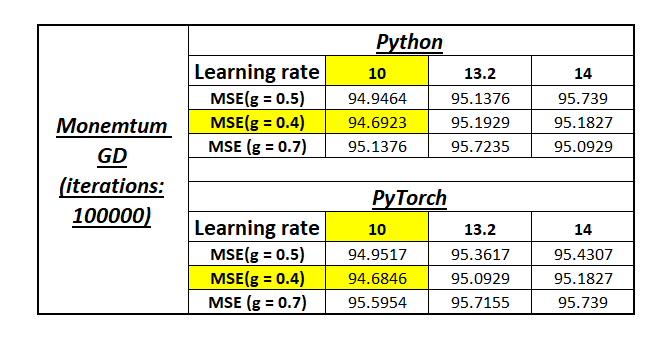


GD with Momentum With Python

In [ ]:
class LinearRegression1:

  def __init__(self):
    self.w = None

  def linearmodel(self, x):
    return np.dot(x, self.w)

  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.linearmodel(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)

  def mean_sqaure_error(self, Y_pred,Y):
    Loss = []
    for i,j in zip(Y, Y_pred):
      L = (i - j)**2
      Loss.append(L)
    return sum(Loss)[0]/(len(Loss))

  def R_squared(self, Y_pred, Y):
    Y_mean = np.mean(Y)
    E1 = np.sum((Y_pred - Y)**2)
    E2 = np.sum((Y - Y_mean)**2)
    return 1 - E1/E2

  def grad_w(self, x, y):
    y_pred = self.linearmodel(x)
    return (2/self.m*(y_pred - y) * x.T).reshape(-1,1)

  def fit(self, X , Y, epochs = 1, lr = 1, gamma = 0.5, initialise = True, display_loss = True):
    self.m = X.shape[0]

    if initialise:
      self.w = np.zeros(X.shape[1]).reshape(-1,1)

    if display_loss:
      self.MSE = {}
      self.R2 = {}

    vw = np.zeros((X.shape[1], 1))
    for i in tqdm(range(epochs+1), total=epochs, unit="epoch"):
      dw = np.zeros((X.shape[1], 1))


      for x, y in zip(X, Y):
        dw = dw + self.grad_w(x, y)

      vw = gamma * vw + lr * dw/(X.shape[0])

      self.w -= vw

      if display_loss:
          Y_pred = self.predict(X)
          self.MSE[i] = self.mean_sqaure_error(Y_pred, Y)
          R2 = self.R_squared(Y_pred, Y)

    return self.w

  def plotting(self):
    fig, ax = plt.subplots()
    ax.plot(list(self.MSE.values()))
    min_y = np.min(list(self.MSE.values()))
    ax.axhline(y=min_y, color='r', linestyle='--')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.title('GD with Momentum \n Epochs = 100000\n Learning Rate = {}'.format(i))
    ymin, ymax = ax.get_ylim()
    ax.yaxis.set_ticks(np.arange(ymin, ymax, (ymax-ymin)/3))
    ax.annotate(str(min_y), xy=(0, min_y), xycoords='data', xytext=(-50, 30),
                textcoords='offset points', arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.2"))
    plt.show()


Learning_rate  = [10, 13.2, 14]
epochs = []
for i in Learning_rate :
  LR = LinearRegression1()
  w = LR.fit(Xs_train, Y_train, 100000, i, 0.5)
  LR.plotting()
  Y_pred = LR.predict(Xs_test)
  MSE  = LR.mean_sqaure_error(Y_pred,Y_test)
  R2  = LR.R_squared(Y_pred, Y_test)
  print('MSE on Test Data at Learning rate',i ,':',MSE)
  print('R2 on Test Data at Learning rate',i ,':',R2)

  0%|          | 0/100000 [00:00<?, ?epoch/s]

KeyboardInterrupt: ignored

GD with Momentum in PyTorch

In [ ]:
class LinearRegression1:

    def __init__(self):
        self.w = None
        self.MSE = None

    def linearmodel(self, x):
        return torch.matmul(x, self.w.t())

    def predict(self, X):
        return self.linearmodel(X)

    def mean_square_error(self, Y_pred, Y):
        diff = Y_pred - Y
        return torch.sum(diff * diff) / diff.numel()

    def R_squared(self, Y_pred, Y):
        Y_mean = torch.mean(Y)
        SS_tot = torch.sum((Y - Y_mean) ** 2)
        SS_res = torch.sum((Y - Y_pred) ** 2)
        return 1 - (SS_res / SS_tot)

    def fit(self, X, Y, epochs=10000, lr=0.11, gamma=0.9, initialise=True, display_loss=True):
        if initialise:
            self.w = torch.randn(1, X.shape[1], requires_grad=True)
            self.v = torch.zeros(1, X.shape[1], requires_grad=True)
        self.MSE = {}
        for i in tqdm(range(epochs+1), total=epochs, unit="epoch"):
            Y_pred = self.linearmodel(X)
            loss = self.mean_square_error(Y_pred, Y)
            if i % 50 == 0:
                self.MSE[i] = loss.data
            loss.backward()
            with torch.no_grad():
                self.v = gamma * self.v + lr * self.w.grad
                self.w -=  self.v/X.shape[0]
                self.w.grad.zero_()


    def plotting(self, lr, epoch):
        fig, ax = plt.subplots()
        ax.plot(list(self.MSE.values()))
        min_y = np.min(list(self.MSE.values()))
        ax.axhline(y=min_y, color='r', linestyle='--')
        plt.xlabel('Epochs')
        plt.ylabel('Mean Squared Error')
        plt.title('GD with Momentum in PyTorch\n Epochs = {}\n Learning Rate = {}'.format(epoch, lr))
        ymin, ymax = ax.get_ylim()
        ax.yaxis.set_ticks(np.arange(ymin, ymax, (ymax-ymin)/3))
        ax.annotate(str(min_y), xy=(0, min_y), xycoords='data', xytext=(-50, 30),
                    textcoords='offset points', arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.2"))
        plt.show()

Learning_rate  = [10, 13.2, 14]
epochs = []
for i in Learning_rate :
  LR = LinearRegression1()
  w = LR.fit(Xp_train, Yp_train, 100000, i, 0.5)
  LR.plotting(i, 100000)
  Y_pred = LR.predict(Xp_test)
  MSE = LR.mean_square_error(Y_pred,Yp_test)
  R2 = LR.R_squared(Y_pred, Yp_test)
  print('MSE on Test Data at Learning rate with Pytorch',i ,':',MSE)
  print('R2on Test Data at Learning rate with Pytorch',i ,':',R2)


  0%|          | 0/100000 [00:00<?, ?epoch/s]

KeyboardInterrupt: ignored

# 4. Repeat question 3 with Nesterov Accelerated Gradient Descent

         With NAGD the overshooting problem of MNGD is bit resolved:

           a. As NAGD uses the gradient of the future position to compute the gradient at the current position,
          which allows the algorithm to anticipate future gradients and move faster in the direction of the minimum.
          The problem of overshoot gets resolved

           b. The obervations with repsect to vanilla GD are same as MNGD

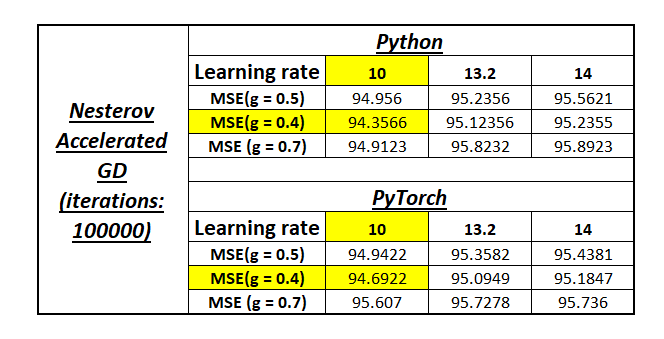

In Python from Scratch

In [ ]:
class LinearRegression1:

  def __init__(self):
    self.w = None

  def linearmodel(self, x):
    return np.dot(x, self.w)

  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.linearmodel(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)

  def mean_sqaure_error(self, Y_pred,Y):
    Loss = []
    for i,j in zip(Y, Y_pred):
      L = (i - j)**2
      Loss.append(L)
    return sum(Loss)[0]/(len(Loss))

  def R_squared(self, Y_pred, Y):
    Y_mean = np.mean(Y)
    E1 = np.sum((Y_pred - Y)**2)
    E2 = np.sum((Y - Y_mean)**2)
    return 1 - E1/E2

  def grad_w(self, x, y):
    y_pred = self.linearmodel(x)
    return (2/self.m*(y_pred - y) * x.T).reshape(-1,1)

  def fit(self, X , Y, epochs = 1, lr = 1, gamma = 0.5, initialise = True, display_loss = True):
    self.m = X.shape[0]

    if initialise:
      self.w = np.zeros(X.shape[1]).reshape(-1,1)

    if display_loss:
      self.MSE = {}
      self.R2 = {}

    vw = np.zeros((X.shape[1], 1))
    for i in tqdm(range(epochs+1), total=epochs, unit="epoch"):
      dw = np.zeros((X.shape[1], 1))


      self.w -= gamma * vw

      for x, y in zip(X, Y):
        dw = dw + self.grad_w(x, y)

      self.w -= lr * dw/X.shape[0]

      vw = gamma * vw + lr * dw/X.shape[0]

      if display_loss:
          Y_pred = self.predict(X)
          self.MSE[i] = self.mean_sqaure_error(Y_pred, Y)
          R2 = self.R_squared(Y_pred, Y)

    return self.w

  def plotting(self):
    fig, ax = plt.subplots()
    ax.plot(list(self.MSE.values()))
    min_y = np.min(list(self.MSE.values()))
    ax.axhline(y=min_y, color='r', linestyle='--')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.title('Nesterov Accelerated Gradient\n Epochs = 50000\n Learning Rate = {}'.format(i))
    ymin, ymax = ax.get_ylim()
    ax.yaxis.set_ticks(np.arange(ymin, ymax, (ymax-ymin)/3))
    ax.annotate(str(min_y), xy=(0, min_y), xycoords='data', xytext=(-50, 30),
                textcoords='offset points', arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.2"))
    plt.show()


Learning_rate  = [10, 13.2, 14 ]
epochs = []
for i in Learning_rate :
  LR = LinearRegression1()
  w = LR.fit(Xs_train, Y_train, 100000, i, 0.5)
  LR.plotting()
  Y_pred = LR.predict(Xs_test)
  MSE  = LR.mean_sqaure_error(Y_pred,Y_test)
  R2  = LR.R_squared(Y_pred, Y_test)
  print('MSE on Test Data at Learning rate',i ,':',MSE)
  print('R2 on Test Data at Learning rate',i ,':',R2)

  0%|          | 0/100000 [00:00<?, ?epoch/s]

KeyboardInterrupt: ignored

NAGD in Pytorch

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

class LinearRegression1:

    def __init__(self):
        self.w = None
        self.MSE = None

    def linearmodel(self, x, w):
        return torch.matmul(x, self.w.t())

    def predict(self, X):
        return self.linearmodel(X, self.w)

    def mean_square_error(self, Y_pred, Y):
        diff = Y_pred - Y
        return torch.sum(diff * diff) / diff.numel()

    def R_squared(self, Y_pred, Y):
        Y_mean = torch.mean(Y)
        SS_tot = torch.sum((Y - Y_mean) ** 2)
        SS_res = torch.sum((Y - Y_pred) ** 2)
        return 1 - (SS_res / SS_tot)

    def fit(self, X, Y, epochs=10000, lr=0.11, gamma=0.9, initialise=True, display_loss=True):
        if initialise:
            self.w = torch.randn(1, X.shape[1], requires_grad=True)
            self.v = torch.zeros(1, X.shape[1], requires_grad=True)
        self.MSE = {}
        for i in tqdm(range(epochs+1), total=epochs, unit="epoch"):
            Y_pred = self.linearmodel(X, self.w)
            loss = self.mean_square_error(Y_pred, Y)
            if i % 50 == 0:
                self.MSE[i] = loss.data
            with torch.no_grad():
                w_temp = self.w - gamma * self.v
            Y_pred = self.linearmodel(X, w_temp)
            loss = self.mean_square_error(Y_pred, Y)
            loss.backward()
            with torch.no_grad():
                self.v = gamma * self.v + lr * self.w.grad
                self.w -= self.v / X.shape[0]
                self.w.grad.zero_()



    def plotting(self, lr, epoch):
        fig, ax = plt.subplots()
        ax.plot(list(self.MSE.values()))
        min_y = np.min(list(self.MSE.values()))
        ax.axhline(y=min_y, color='r', linestyle='--')
        plt.xlabel('Epochs')
        plt.ylabel('Mean Squared Error')
        plt.title('Nesterov Accelerated Gradient with Momentum in PyTorch\n Epochs = {}\n Learning Rate = {}'.format(epoch, lr))
        ymin, ymax = ax.get_ylim()
        ax.yaxis.set_ticks(np.arange(ymin, ymax, (ymax-ymin)/3))
        ax.annotate(str(min_y), xy=(0, min_y), xycoords='data', xytext=(-50, 30),
                    textcoords='offset points', arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.2"))
        plt.show()

Learning_rate  = [10]
epochs = []
for i in Learning_rate :
  LR = LinearRegression1()
  w = LR.fit(Xp_train, Yp_train, 100000, i, 0.4)
  LR.plotting(i, 100000)
  Y_pred = LR.predict(Xp_test)
  MSE = LR.mean_square_error(Y_pred,Yp_test)
  R2 = LR.R_squared(Y_pred, Yp_test)
  print('MSE on Test Data at Learning rate with Pytorch',i ,':',MSE)
  print('R2on Test Data at Learning rate with Pytorch',i ,':',R2)


 24%|██▎       | 23673/100000 [00:05<00:19, 4012.86epoch/s]


KeyboardInterrupt: ignored